# Лабораторна робота 1
Пшеничного Ніколи, ДО-3


In [3]:
library(psych)
library(ggplot2)
library(moments)
library(gamlss)
library(goftest)
library(goft)
library(qqplotr)

In [1]:
data <- read.csv("/Users/nicol/OneDrive/Документы/Я у мамы программист/R/Lab1/WHR_2023.csv", header = TRUE)
View(data)
#вектор спостережень: рівень щастя в різних країнах
dataHappiness <- data[, "happiness_score"]


country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520
Norway,Western Europe,7.315,1.994,1.521,0.544,0.752,0.212,0.463
Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418


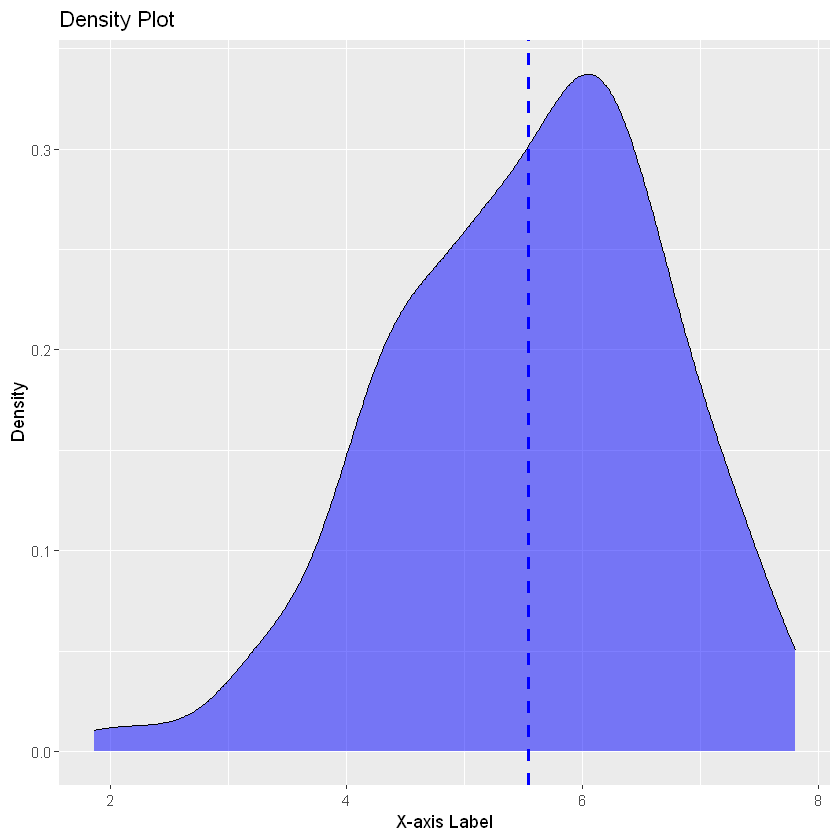

In [7]:
p<-ggplot(data.frame(dataHappiness), aes(x = dataHappiness)) +
  geom_density(fill = "blue", alpha = 0.5)+
  labs(
    title = "Density Plot",
    x = "X-axis Label",
    y = "Density"
  )
p+geom_vline(aes(xintercept=mean(dataHappiness)),
            color="blue", linetype="dashed", size=1)

## 1) Підрахувати показники центру: середнє значення, медіану

In [8]:
#Вибіркове середнє
mean(dataHappiness)

[1] 5.539796

In [9]:
#Медіана
median(dataHappiness)

[1] 5.684

## 2) Підрахувати показники варіації: дисперсію, стандартне відхилення, коефіцієнт варіації, розмах варіації та інтерквартильний розмах

In [2]:
#Дисперсія:
var(dataHappiness)

[1] 1.299438

In [3]:
#Стандартне відхилення
averageDeviation <- sd(dataHappiness)
averageDeviation

[1] 1.139929

In [13]:
# Коефіцієнт варіації:
averageDeviation / mean(dataHappiness)

[1] 0.2057709

In [14]:
# Розмах варіації:
range(dataHappiness)

[1] 1.859 7.804

In [15]:
max(dataHappiness) - min(dataHappiness)

[1] 5.945

In [16]:
# Інтерквартильний розмах:
IQR(dataHappiness)

[1] 1.61

## 3. Побудувати ящик з вусами

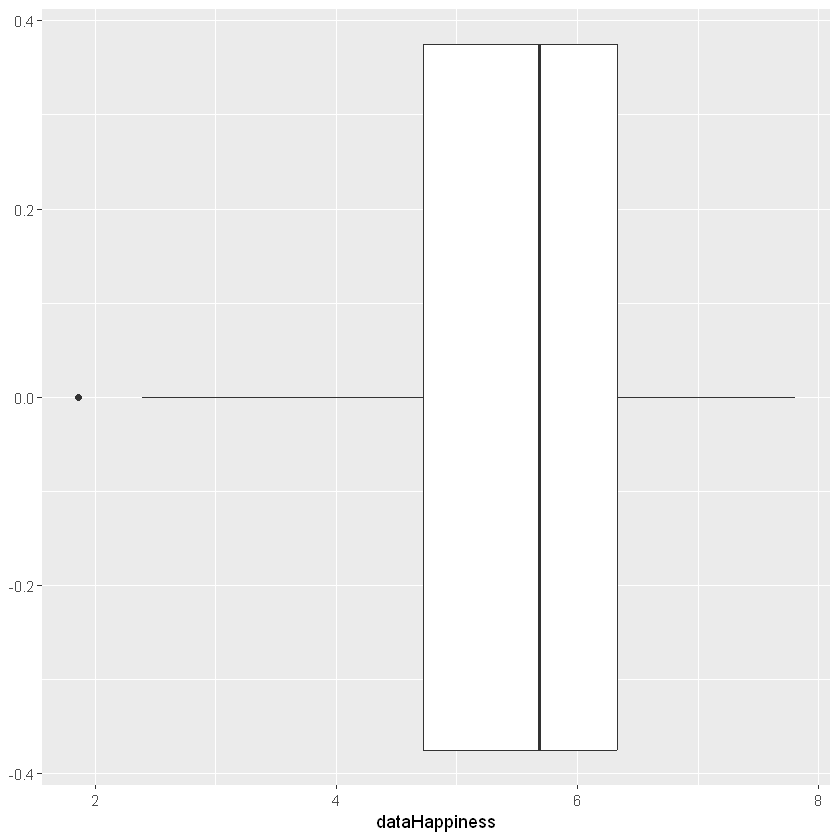

In [19]:
bp <-ggplot(data.frame(dataHappiness), aes(x = dataHappiness)) + geom_boxplot()
bp

## 4) Вивести п’ятиточкову характеристику (екстремальні точки та квартилі)

In [20]:
quantile(dataHappiness)

0%   25%   50%   75%  100% 
1.859 4.724 5.684 6.334 7.804

## 5) Знайти 1-й та 9-й децилі

In [21]:
quantile(dataHappiness, p = c(0.1, 0.9))

10%    90% 
4.1084 6.9008

## 6)  Знайти коефіцієнт асиметрії та коефіцієнт ексцесу

In [22]:
# Коефіцієнт асиметрії:
skewness(dataHappiness)

[1] -0.4518577

In [23]:
# Коефіцієнт ексцесу:
kurtosis(dataHappiness)

[1] 3.017915

## 7) Побудувати гістограму, використовуючи різні методи групування (базове правило, правило Скотта, правило Фрідмана-Діаконіса). На тому ж графіку (одному з них) зобразити оцінку щільності та графік щільності гіпотетичного розподілу. Сформулювати припущення щодо типу розподілу, що спостерігається.

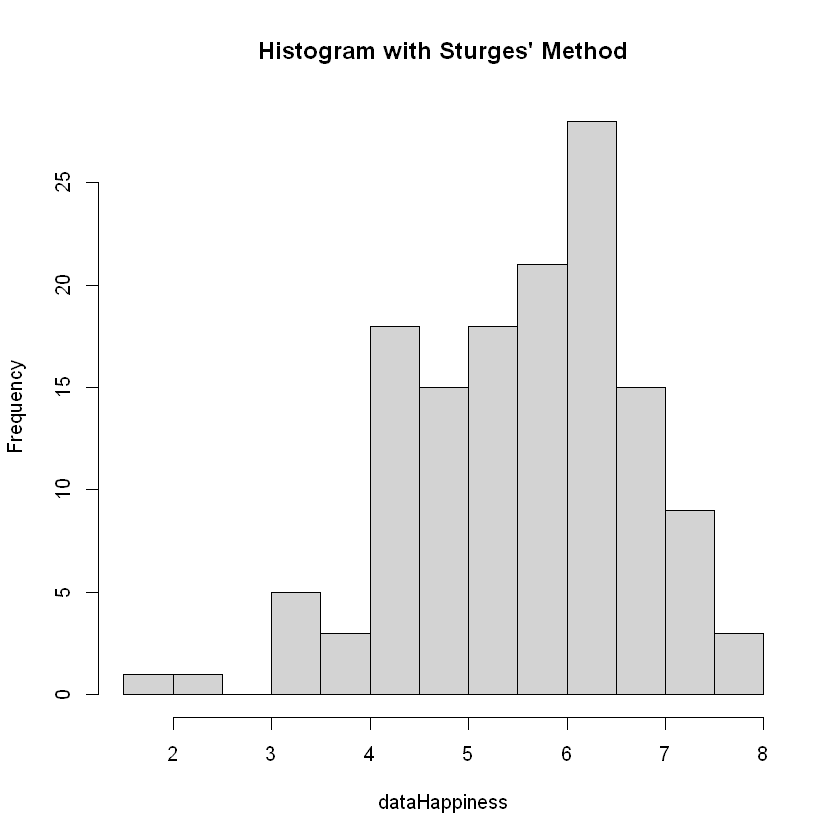

In [24]:
# Гістограма з базовим методом групування
hist(dataHappiness, breaks = "Sturges", main = "Histogram with Sturges' Method")

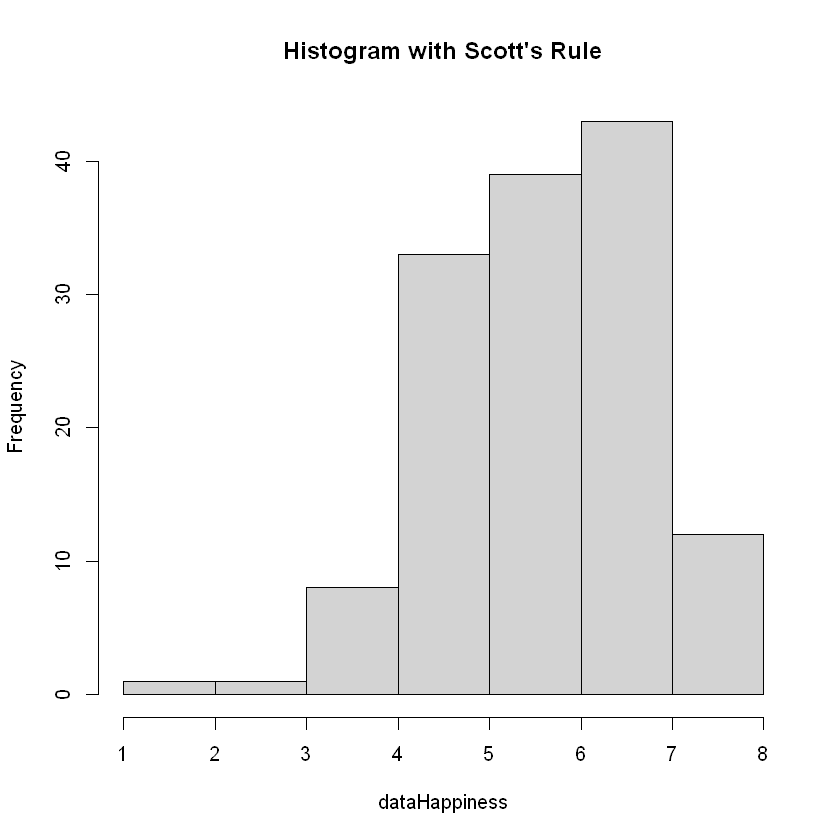

In [25]:
# Гістограма з правилом Скотта
hist(dataHappiness, breaks = "Scott", main = "Histogram with Scott's Rule")

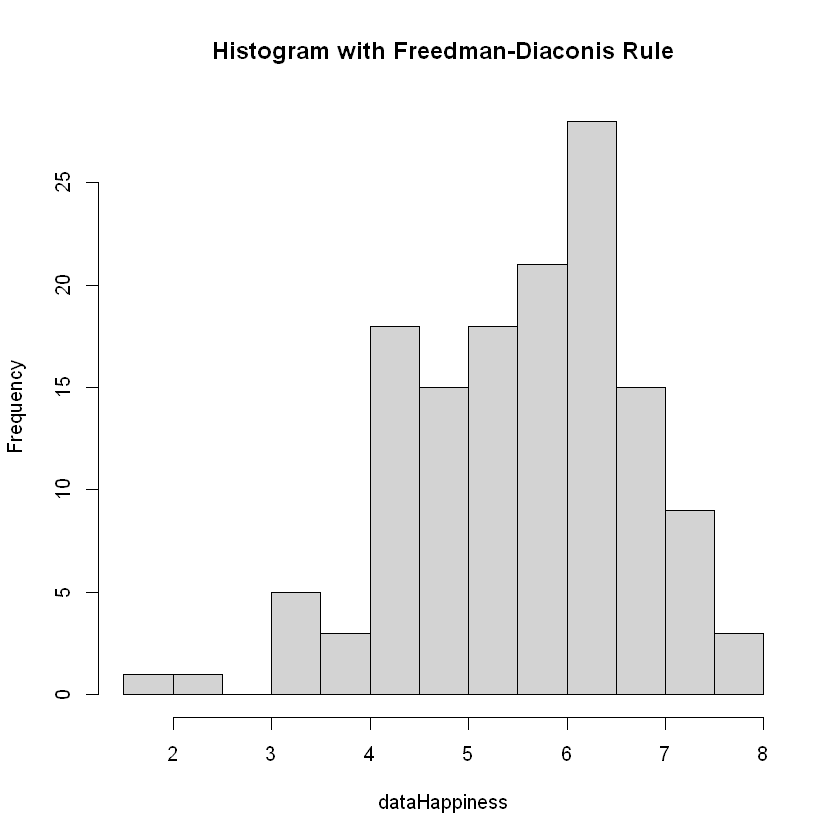

In [241]:
# Гістограма з правилом Фрідмана-Діаконіса
hist(dataHappiness, breaks = "FD", main = "Histogram with Freedman-Diaconis Rule")

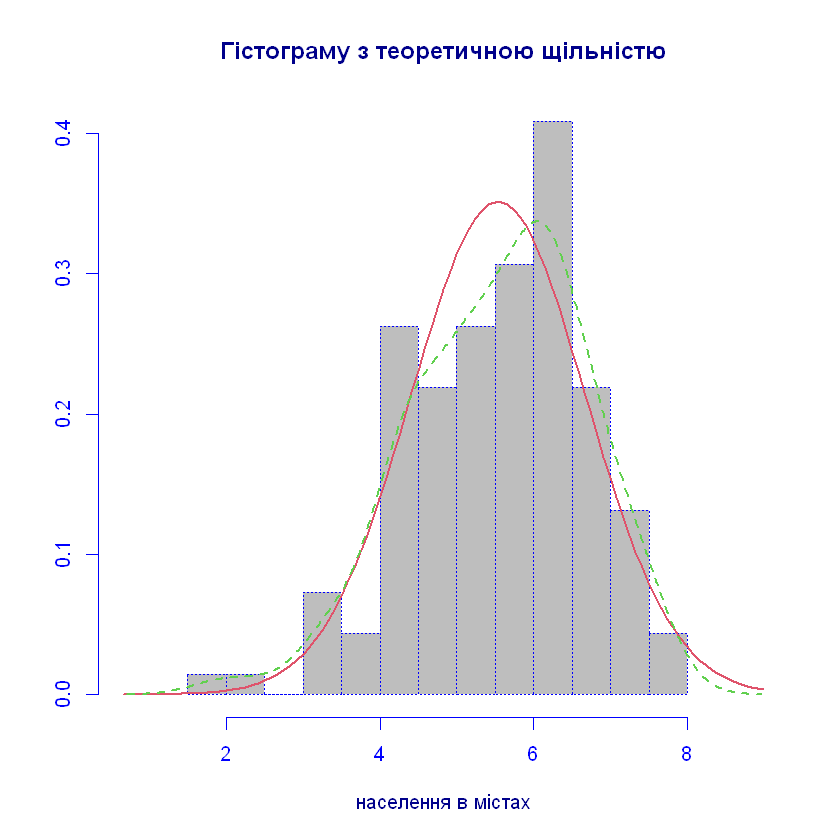

In [242]:
hd.values = histDist(dataHappiness, family = NO, density = TRUE, xlab='населення в містах', ylab='', main='Гістограму з теоретичною щільністю')

## 8) Зобразити Q-Q-діаграму для перевірки узгодженості з гіпотетичним розподілом.

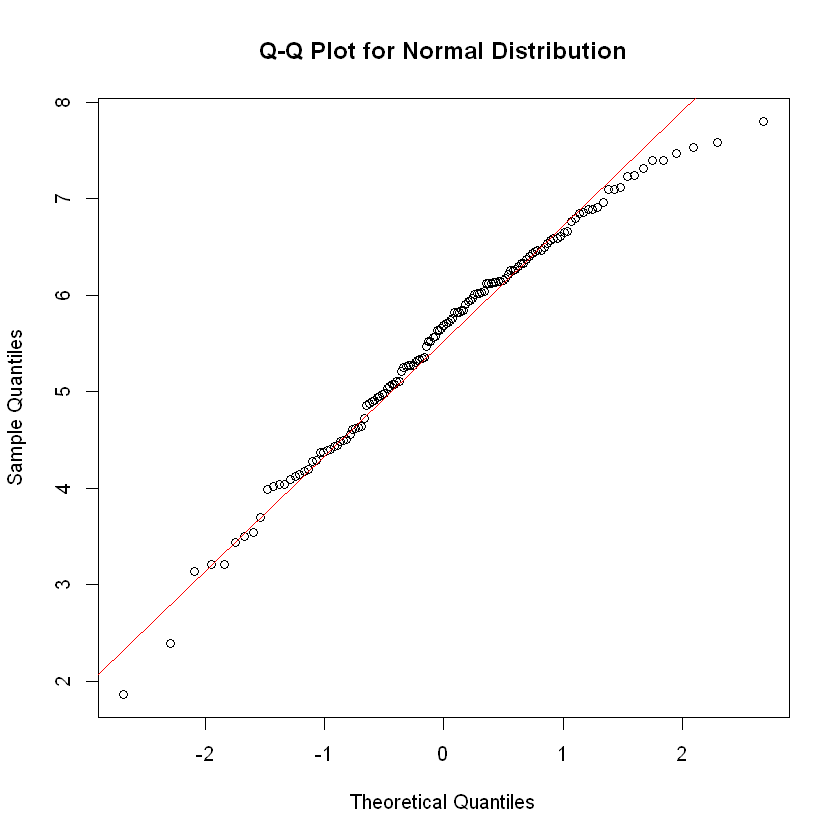

In [243]:
qqnorm(dataHappiness, main = "Q-Q Plot for Normal Distribution")
qqline(dataHappiness, col = "red")

## 9) Зобразити P-P-діаграму для перевірки узгодженості з гіпотетичним розподілом


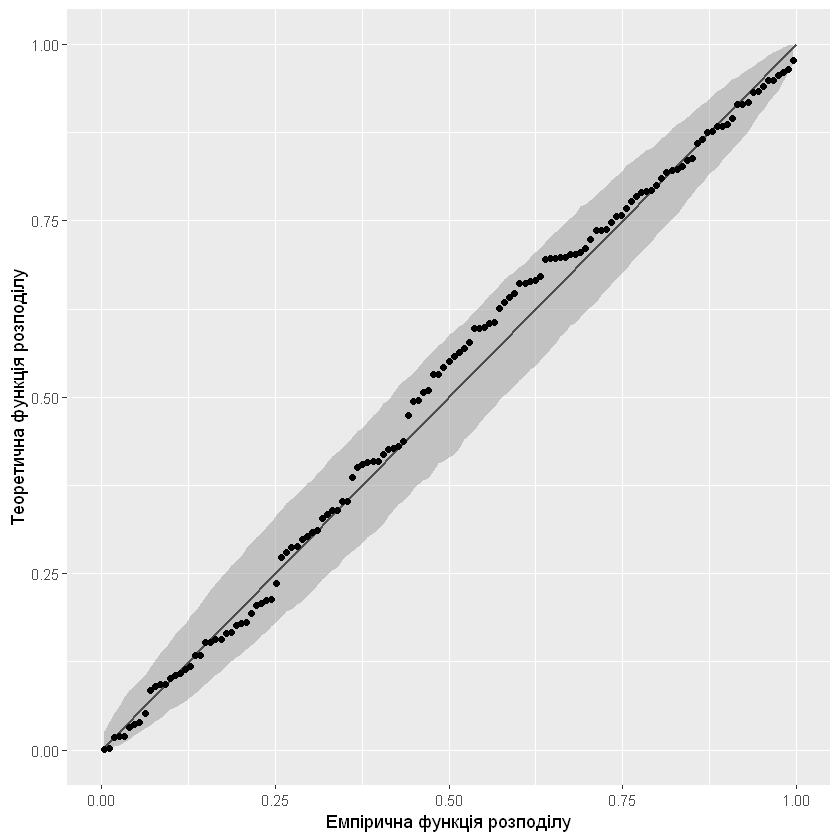

In [248]:
ggplot(data = data.frame(dataHappiness), aes(sample = dataHappiness)) +
    stat_pp_band() +
    stat_pp_line() +
    stat_pp_point() +
    labs(x = "Емпірична функція розподілу", y = "Теоретична функція розподілу")

In [254]:
cvm.test(dataHappiness, "pnorm",mean = mean(dataHappines), sd = sd(dataHappiness))


	Cramer-von Mises test of goodness-of-fit
	Null hypothesis: Normal distribution
	with parameters mean = 5.53979562043796, sd = 1.13992874608773
	Parameters assumed to be fixed

data:  dataHappiness
omega2 = 0.0928, p-value = 0.622
